# Notebook za vizualizaciju podataka
U ovom notebook-u cilj je bio upoznavanje sa podacima, njihovom strukturom i vizualizacija istih.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pathlib import Path

In [8]:
DATA_DIR = Path("../data/raw")
CSV_NAME = "ARIAL.csv"
csv_path = DATA_DIR / CSV_NAME

print("Reading:", csv_path)

df = pd.read_csv(csv_path)

print("Loaded:", CSV_NAME)
print("Shape: ", df.shape)

df.head()

Reading: ../data/raw/ARIAL.csv
Loaded: ARIAL.csv
Shape:  (26237, 412)


,font,fontVariant,m_label,strength,italic,orientation,m_top,m_left,originalH,originalW,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,ARIAL,scanned,48,0.4,0,0.0,0,0,15,25,...,255,255,255,154,1,1,1,1,1,1
1,ARIAL,scanned,50,0.4,0,0.0,0,0,18,11,...,213,225,229,239,240,240,221,209,116,95
2,ARIAL,scanned,83,0.4,0,0.0,0,0,13,10,...,255,255,255,255,255,255,1,1,1,1
3,ARIAL,scanned,48,0.4,0,0.0,0,0,15,18,...,1,1,1,1,1,1,1,1,1,1
4,ARIAL,scanned,54,0.4,0,0.0,0,0,14,30,...,255,255,255,255,1,1,1,1,1,1


m_label: 48 decoded: 0
pixel min/max: 1.0 255.0


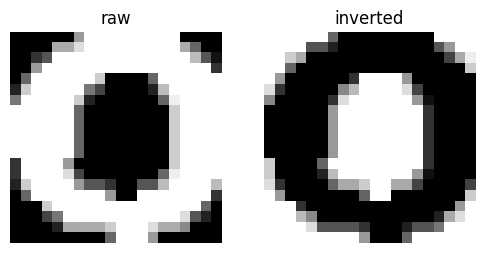

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# pixel kolone i rekonstrukcija
pix_cols = [col for col in df.columns if col.startswith("r")]

i = 0
label = int(df.loc[i, "m_label"])
char = chr(label)

img = df.loc[i, pix_cols].astype(np.float32).to_numpy().reshape(20, 20)

print("m_label:", label, "decoded:", char)
print("pixel min/max:", img.min(), img.max())

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("raw")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(255 - img, cmap="gray")
plt.title("inverted")
plt.axis("off")

plt.show()


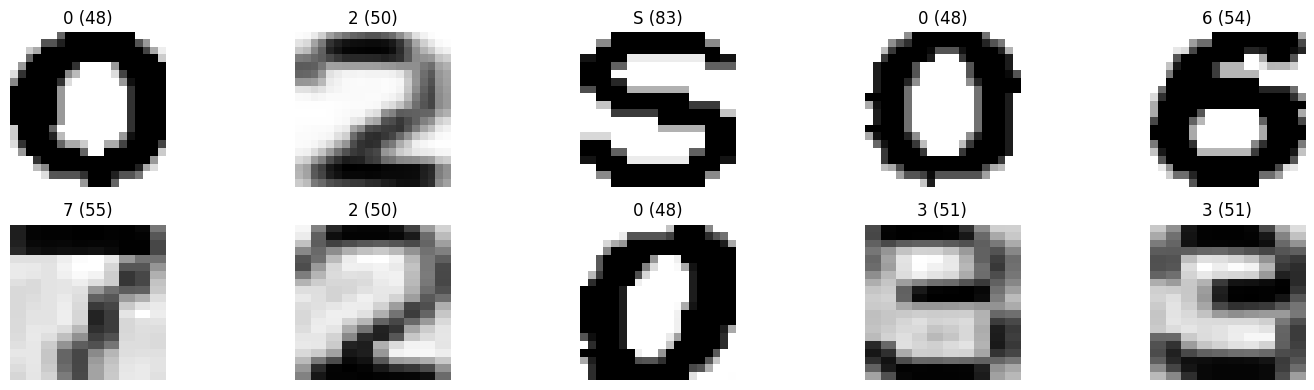

In [ ]:
images = []

for i in range(10):  
    label = int(df.loc[i, "m_label"])
    ch = chr(label)

    img = df.loc[i, pix_cols].astype(np.float32).to_numpy().reshape(20, 20)
    images.append((ch, img, label))

plt.figure(figsize=(15, 4))
for k, (ch, img, label) in enumerate(images, start=1):
    plt.subplot(2, 5, k)
    plt.imshow(255 - img, cmap="gray")
    plt.title(f"{ch} ({label})")
    plt.axis("off")

plt.tight_layout()
plt.savefig("reports/figures/sample.grid.png", dpi=200, bbox_inches="tight")
plt.show()